In [59]:
import polars as pl
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib as mpl

In [20]:
df = (
    pl.scan_ndjson("./laplace-test-out.jsonl")
        .drop(['compile'])
        .explode('runs')
        .unnest('runs')
        .drop(['stdout', 'stderr', 'exit_code'])
        .collect()
        .group_by("test")
     )
df

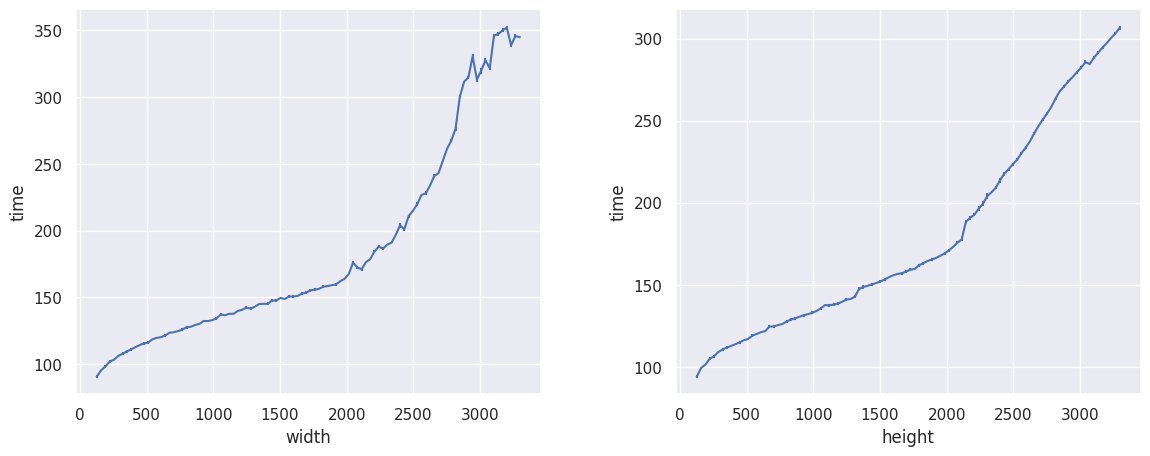

In [92]:
f = mpl.figure.Figure(figsize=(12, 5))
subfigures = f.subfigures(1, 2)
for i, (group, group_df) in enumerate(df):
    col = group[0]
    so.Plot(group_df, x=col, y='time').add(
        so.Lines(),
        so.Agg()
    ).add(
        so.Range(),
        so.Est(errorbar="sd")
    ).on(subfigures[i]).plot()
f.savefig('./figures/graph.png', dpi=300)
f